# Comparación de clasificadores

Una de las tareas de la Minería de Datos es la clasificación o la discriminación de datos; asociándolos en parejas o en grupos predefinidos; aprendizaje supervisado. Esta tarea es encontrar modelos (funciones) que describen y distinguen clases o conceptos para futuras predicciones.

La aplicación de este concepto la podemos encontrar en y para la calificación de un crédito bancario, reconocimiento de imágenes y patrones, diagnósticos médicos, detección de fallos en aplicaciones industriales clasificar tendencias de mercados financieros,…

Algunos de los métodos utilizados son los siguientes:
    - Análisis discriminante.
    - Arboles de decisiones.
    - Reglas de clasificación.
    - Redes neuronales.

In [2]:
import numpy as np
from keras.datasets import imdb
from keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from sklearn import metrics
from termcolor import colored
import matplotlib.pyplot as plt

def show_shapes(x_train, y_train, x_test, y_test, color='green'):
    print(colored('Training shape:', color, attrs=['bold']))
    print('  x_train.shape:', x_train.shape)
    print('  y_train.shape:', y_train.shape)
    print(colored('\nTesting shape:', color, attrs=['bold']))
    print('  x_test.shape:', x_test.shape)
    print('  y_test.shape:', y_test.shape)
    print('')
    
    

Using TensorFlow backend.


## Naive Bayes

Es una técnica de clasificación basada en el Teorema de Bayes con un supuesto de independencia entre los predictores. En términos simples, un clasificador Naive Bayes asume que la presencia de una característica particular en una clase no está relacionada con la presencia de cualquier otra característica. 

Por ejemplo, una fruta puede considerarse una manzana si es roja, redonda y de aproximadamente 3 pulgadas de diámetro. Incluso si estas características dependen unas de otras o de la existencia de las otras características, un Clasificador Naive Bayes consideraría que todas estas propiedades contribuyen independientemente a la probabilidad de que esta fruta sea una manzana.

El modelo Ingenuo Bayesiano es fácil de construir y particularmente útil para conjuntos de datos muy grandes. Junto con la simplicidad, se sabe que Naive Bayes supera incluso a los métodos de clasificación altamente sofisticados.

El teorema de Bayes proporciona una forma de calcular la probabilidad posterior P (c|x) a partir de P (c), P (x) y P (x|c). 

<img src="eq_bayes.png" alt="Drawing" style="width: 400px;"/>


                                        *Fig1. Teorema de bayes*


Donde:

    • P (c|x) es la probabilidad posterior de la clase (objetivo) dado el predictor (atributo).
    • P (c) es la probabilidad previa de la clase.
    • P (x|c) es la probabilidad del predictor de una clase determinada.
    • P (x) es la probabilidad previa del predictor.


Training shape:
  x_train.shape: (25000, 2315)
  y_train.shape: (25000,)

Testing shape:
  x_test.shape: (25000, 2315)
  y_test.shape: (25000,)

Prediction accuracy:
50.132%

Confusion matrix:
[[12453    47]
 [12420    80]]


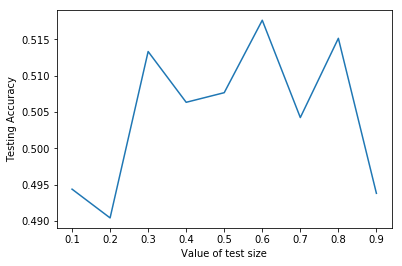

MAX prediction accuracy:
51.763668430335095%



In [2]:
from sklearn.naive_bayes import GaussianNB

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

maxlen = 2315
color = 'green'
x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)
show_shapes(x_train, y_train, x_test, y_test, color)

naive = GaussianNB()
naive.fit(x_train, y_train)
y_pred = naive.predict(x_test)
print(colored('Prediction accuracy:', color, attrs=['bold']))
print(str(np.mean(y_pred == y_test) * 100) + '%' + '\n') 

# Confussion matrix
# 
#              Predicted = No | Predicted = Yes
# Actual = No          X                X
# Actual = Yes         X                X

print(colored('Confusion matrix:', color, attrs=['bold']))
print(metrics.confusion_matrix(y_test, y_pred))

test_size_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y_scores = []
for size in test_size_range:
    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = size, random_state = 4)  
    naive = GaussianNB()
    naive.fit(x_train, y_train)
    y_pred = naive.predict(x_test)
    y_scores.append(metrics.accuracy_score(y_test, y_pred))


plt.plot(test_size_range, y_scores)
plt.xlabel('Value of test size')
plt.ylabel('Testing Accuracy')
plt.show()

print(colored('MAX prediction accuracy:', color, attrs=['bold']))
print(str(max(y_scores) * 100) + '%' + '\n') 

## K-Nearest Neighbours 

Puede ser usado tanto para problemas de clasificación como de regresión. Sin embargo, es más ampliamente utilizado en problemas de clasificación en la industria. kNN es un algoritmo simple que almacena todos los casos disponibles y clasifica los nuevos casos por mayoría de votos de la variable k. El caso que se asigna a la clase es más común entre la variable k más cercana medida por una función de distancia.

Estas funciones de distancia pueden ser Euclidiana, Manhattan, Minkowski y Hamming. Las primeras tres funciones se utilizan para la función continua y la cuarta (Hamming) para las variables categóricas. Si k = 1, entonces el caso se asigna simplemente a la clase de k más cercana. A veces, elegir k resulta ser un desafío al realizar el modelado kNN.

<img src="knn.png" alt="Drawing" style="width: 400px;"/>

                                        Fig. 2 Clasificador de kNN.


kNN puede aplicarse fácilmente a nuestras vidas reales. Si desea obtener información sobre una persona de la que no tiene información, ¡le gustaría conocer a sus amigos cercanos y los círculos que frecuenta y obtener acceso a su información!

Cosas a considerar antes de seleccionar kNN:

    • kNN es computacionalmente caro.
    • Las variables deben normalizarse, de lo contrario, las variables de rango superior pueden sesgarla.
    • Funciona en la etapa de pre-procesamiento, antes de optar por kNN como valor atípico, eliminación de 
    ruido.


Training shape:
  x_train.shape: (25000, 2315)
  y_train.shape: (25000,)

Testing shape:
  x_test.shape: (25000, 2315)
  y_test.shape: (25000,)



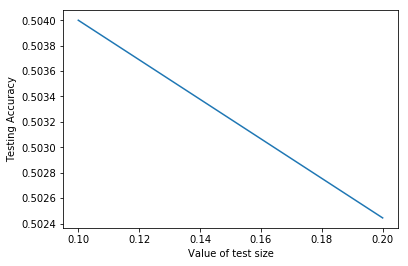

MAX prediction accuracy:
50.4%



In [8]:
from sklearn.neighbors import KNeighborsClassifier

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

maxlen = 2315
color = 'green'
x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)
show_shapes(x_train, y_train, x_test, y_test, color)


#knn = KNeighborsClassifier(n_neighbors=1, n_jobs = 8)
#knn.fit(x_train, y_train)
#y_pred = knn.predict(x_test)
#print(colored('Prediction accuracy:', color, attrs=['bold']))
#print(str(np.mean(y_pred == y_test) * 100) + '%' + '\n') 

# Confussion matrix
# 
#              Predicted = No | Predicted = Yes
# Actual = No          X                X
# Actual = Yes         X                X

#print(colored('Confusion matrix:', color, attrs=['bold']))
#print(metrics.confusion_matrix(y_test, y_pred))

#neighbors = range(1, 5)
#y_scores = []
#for n in neighbors:
#    knn = KNeighborsClassifier(n_neighbors = n, n_jobs = 8)
#    knn.fit(x_train, y_train)
#    y_pred = knn.predict(x_test)
#    y_scores.append(metrics.accuracy_score(y_test, y_pred))


#plt.plot(neighbors, y_scores)
#plt.xlabel('Neighbors quantity')
#plt.ylabel('Testing Accuracy')
#plt.show()

#print(colored('MAX prediction accuracy:', color, attrs=['bold']))
#print(str(max(y_scores) * 100) + '%' + '\n') 

#test_size_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
test_size_range = [0.1, 0.2]
y_scores = []
for size in test_size_range:
    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = size, random_state = 4)  
    knn = KNeighborsClassifier(n_neighbors = 1, n_jobs = 8)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    y_scores.append(metrics.accuracy_score(y_test, y_pred))


plt.plot(test_size_range, y_scores)
plt.xlabel('Value of test size')
plt.ylabel('Testing Accuracy')
plt.show()

print(colored('MAX prediction accuracy:', color, attrs=['bold']))
print(str(max(y_scores) * 100) + '%' + '\n') 

## Support Vector Machines

En este método de clasificación, se traza cada elemento de datos como un punto en el espacio n-dimensional (donde n es el número de entidades que tiene) con el valor de cada entidad como el valor de una coordenada en particular.

Por ejemplo, si solo tuviéramos dos características como la altura y la longitud del cabello de un individuo, primero dibujaríamos estas dos variables en un espacio bidimensional donde cada punto tiene dos coordenadas (estas coordenadas se conocen como vectores de soporte)

<img src="svm1.png" alt="Drawing" style="width: 400px;"/>

                                        Fig. 3 Ejemplo Clasificador SVM.


Ahora, encontraremos una línea que divide los datos entre los dos grupos de datos clasificados de manera diferente. Esta será la línea tal que las distancias desde el punto más cercano en cada uno de los dos grupos estarán más alejadas.

<img src="svm2.png" alt="Drawing" style="width: 400px;"/>

                                        Fig. 4 Ejemplo Clasificador SVM.
                                    
En el ejemplo que se muestra arriba, la línea que divide los datos en dos grupos clasificados de manera diferente es la línea negra, ya que los dos puntos más cercanos son los más alejados de la línea. Esta línea es nuestro clasificador. Luego, dependiendo de dónde caigan los datos de prueba a ambos lados de la línea, esa es la clase en la que podemos clasificar los nuevos datos.


In [ ]:
from sklearn import svm

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

maxlen = 2315
color = 'green'
x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)
show_shapes(x_train, y_train, x_test, y_test, color)

#vector = svm.SVC(kernel='linear')
#vector.fit(x_train, y_train)
#y_pred = vector.predict(x_test)
#print(colored('Prediction accuracy:', color, attrs=['bold']))
#print(str(np.mean(y_pred == y_test) * 100) + '%' + '\n') 

# Confussion matrix
# 
#              Predicted = No | Predicted = Yes
# Actual = No          X                X
# Actual = Yes         X                X

#print(colored('Confusion matrix:', color, attrs=['bold']))
#print(metrics.confusion_matrix(y_test, y_pred))

#test_size_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
test_size_range = [0.1, 0.2]
y_scores = []
for size in test_size_range:
    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = size, random_state = 4)  
    vector = svm.SVC(kernel='linear')
    vector.fit(x_train, y_train)
    y_pred = vector.predict(x_test)
    y_scores.append(metrics.accuracy_score(y_test, y_pred))


plt.plot(test_size_range, y_scores)
plt.xlabel('Value of test size')
plt.ylabel('Testing Accuracy')
plt.show()

print(colored('MAX prediction accuracy:', color, attrs=['bold']))
print(str(max(y_scores) * 100) + '%' + '\n') 


Training shape:
  x_train.shape: (25000, 2315)
  y_train.shape: (25000,)

Testing shape:
  x_test.shape: (25000, 2315)
  y_test.shape: (25000,)



## Decision tree

La motivación de este clasificador radica en el contexto de que se tienen varias clases de datos y dentro de esas clases existen subclases, por lo tanto, se puede seguir un camino para la selección de la clase de datos, que esta a su vez se relaciona con los datos que fueron utilizados al momento de entrenar el clasificador.

Diciéndolo de otro modo el árbol de clasificación, repetitivamente divide el área de búsqueda de los datos, en subpartes identificadas por un delimitador.

<img src="tree.png" alt="Drawing" style="width: 600px;"/>

                                    Fig. 5 Ejemplo árbol de decisión sobre el clima.
                                
Aunque en estas subclases divididas por los delimitadores podemos contener impurezas, lo cual significa que datos que pertenecen a una subclase se encuentran también en otra. En este caso nos puede ayudar la entropía que mide la aleatoriedad de los elementos en las clases, lo cual ayuda a determinar el grado de impureza de los datos.

<img src="entropy.jpg" alt="Drawing" style="width: 300px;"/>

                                                    Fig. 6 Entropía.
                                

Training shape:
  x_train.shape: (25000, 2315)
  y_train.shape: (25000,)

Testing shape:
  x_test.shape: (25000, 2315)
  y_test.shape: (25000,)



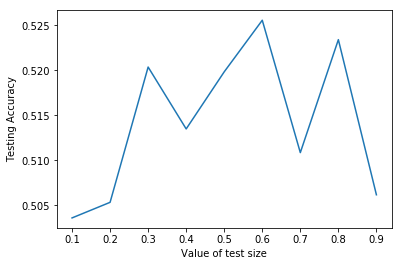

MAX prediction accuracy:
52.557319223985886%



In [5]:
from sklearn.tree import DecisionTreeClassifier


(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

maxlen = 2315
color = 'green'
x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)
show_shapes(x_train, y_train, x_test, y_test, color)

#tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=3, min_samples_leaf=5)
#tree.fit(X_train, y_train)
#y_pred = tree.predict(x_test)
#print(colored('Prediction accuracy:', color, attrs=['bold']))
#print(str(np.mean(y_pred == y_test) * 100) + '%' + '\n') 

# Confussion matrix
# 
#              Predicted = No | Predicted = Yes
# Actual = No          X                X
# Actual = Yes         X                X

#print(colored('Confusion matrix:', color, attrs=['bold']))
#print(metrics.confusion_matrix(y_test, y_pred))

test_size_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y_scores = []
for size in test_size_range:
    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = size, random_state = 4)  
    tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100, max_depth=10, min_samples_leaf=2)
    tree.fit(x_train, y_train)
    y_pred = tree.predict(x_test)
    y_scores.append(metrics.accuracy_score(y_test, y_pred))


plt.plot(test_size_range, y_scores)
plt.xlabel('Value of test size')
plt.ylabel('Testing Accuracy')
plt.show()

print(colored('MAX prediction accuracy:', color, attrs=['bold']))
print(str(max(y_scores) * 100) + '%' + '\n') 

## Random Forest

Este algoritmo de clasificación esta basado en los arboles de decisión. El algoritmo de bosque aleatorio genera un conjunto de arboles de decisión a los cuales entrena con un conjunto de datos aleatorios, una vez que cada árbol tiene la clasificación de las clases y subclases, se procede a realizar una votación para la decisión final de las clases. Esto ayuda a solventar el problema de sobre alimentación que pueden llegar a tener los arboles de clasificación.

Para la votación de los árboles de selección se puede dar mayor peso a las clases de los árboles con menor porcentaje de error y a su vez darles menor peso a los árboles con mayor porcentaje de error.

<img src="forest.png" alt="Drawing" style="width: 400px;"/>

                                    Fig. 7 Ejemplo simple de un bosque aleatorio.


Se puede comparar este algoritmo con el de vecinos cercanos dado que ambos usan un esquema en el cual se la da un peso a una entidad (vecino u árbol). Y en base a eso los algoritmos realizan sus predicciones.

Training shape:
  x_train.shape: (25000, 2315)
  y_train.shape: (25000,)

Testing shape:
  x_test.shape: (25000, 2315)
  y_test.shape: (25000,)

Prediction accuracy:
50.3%

Confusion matrix:
[[6314 6186]
 [6239 6261]]
MAX prediction accuracy:
50.3%



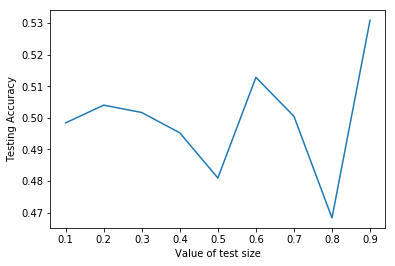

MAX prediction accuracy:
53.086419753086425%



In [7]:
from sklearn.ensemble import RandomForestRegressor

(x_train, y_train), (x_test, y_test) = imdb.load_data(path="imdb.npz",
                                                      num_words=None,
                                                      skip_top=0,
                                                      maxlen=None,
                                                      seed=113,
                                                      start_char=1,
                                                      oov_char=2,
                                                      index_from=3)

maxlen = 2315
color = 'green'
x_train = sequence.pad_sequences(x_train, maxlen = maxlen)
x_test = sequence.pad_sequences(x_test, maxlen = maxlen)
show_shapes(x_train, y_train, x_test, y_test, color)


forest = RandomForestRegressor(n_estimators = 1, random_state = 42, n_jobs = 8)
forest.fit(x_train, y_train)
y_pred = forest.predict(x_test)
print(colored('Prediction accuracy:', color, attrs=['bold']))
print(str(np.mean(y_pred == y_test) * 100) + '%' + '\n') 

# Confussion matrix
# 
#              Predicted = No | Predicted = Yes
# Actual = No          X                X
# Actual = Yes         X                X

print(colored('Confusion matrix:', color, attrs=['bold']))
print(metrics.confusion_matrix(y_test, y_pred))

#forests = range(1, 5)
#y_scores = []
#for f in forests:
#    forest = RandomForestRegressor(n_estimators = f, random_state = 42, n_jobs = 8)
#    forest.fit(x_train, y_train)
#    y_pred = forest.predict(x_test)
#    y_scores.append(metrics.accuracy_score(y_test, y_pred))


#plt.plot(forests, y_scores)
#plt.xlabel('Trees quantity')
#plt.ylabel('Testing Accuracy')
#plt.show()

print(colored('MAX prediction accuracy:', color, attrs=['bold']))
print(str(max(y_scores) * 100) + '%' + '\n') 

test_size_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
y_scores = []
for size in test_size_range:
    x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size = size, random_state = 4)  
    forest = RandomForestRegressor(n_estimators = 1, random_state = 42, n_jobs = 8)
    forest.fit(x_train, y_train)
    y_pred = forest.predict(x_test)
    y_scores.append(metrics.accuracy_score(y_test, y_pred))


plt.plot(test_size_range, y_scores)
plt.xlabel('Value of test size')
plt.ylabel('Testing Accuracy')
plt.show()

print(colored('MAX prediction accuracy:', color, attrs=['bold']))
print(str(max(y_scores) * 100) + '%' + '\n') 

## REFERENCIAS

1. Keras: The Python Deep Learning library, IMDB Movie reviews sentiment classification, https://keras.io/datasets/#imdb-movie-reviews-sentiment-classification

2. Essentials of Machine Learning Algorithms (with Python and R Codes), https://www.analyticsvidhya.com/blog/2017/09/common-machine-learning-algorithms/

3. Machine Learning algorithms, Decision Tree, https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/ml-decision-tree/tutorial/

4. Random Forest, https://en.wikipedia.org/wiki/Random_forest 